In [2]:
#Importing required libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Exploratory data analysis and importing data set
df = pd.read_csv('Medical Price Dataset.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
# Looking for how many unique values there are in the categorical features
print('Different regions - ', df['region'].unique())
print('Different numbers of children - ', df['children'].unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

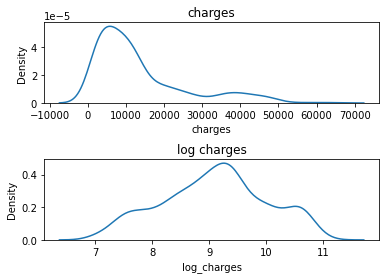

In [4]:
# Adding a log charges as well as charges to train a model to later
df['log_charges'] = np.log(df['charges'])

# PLotting the distribution of charges and log charges to check for normal distribution
fig, ax = plt.subplots(nrows=2)
sns.distplot(df['charges'], ax=ax[0], hist=False).set_title('charges')
sns.distplot(df['log_charges'], ax=ax[1], hist=False).set_title('log charges')
plt.subplots_adjust(hspace=0.7)
plt.show()

In [5]:
print('bmi correlation - ', df['charges'].corr(df['bmi']))
print('age correlation - ', df['charges'].corr(df['age']))

bmi correlation -  0.19834096883362892
age correlation -  0.29900819333064765


In [6]:
#There is a significant correlation between both bmi and age with charges

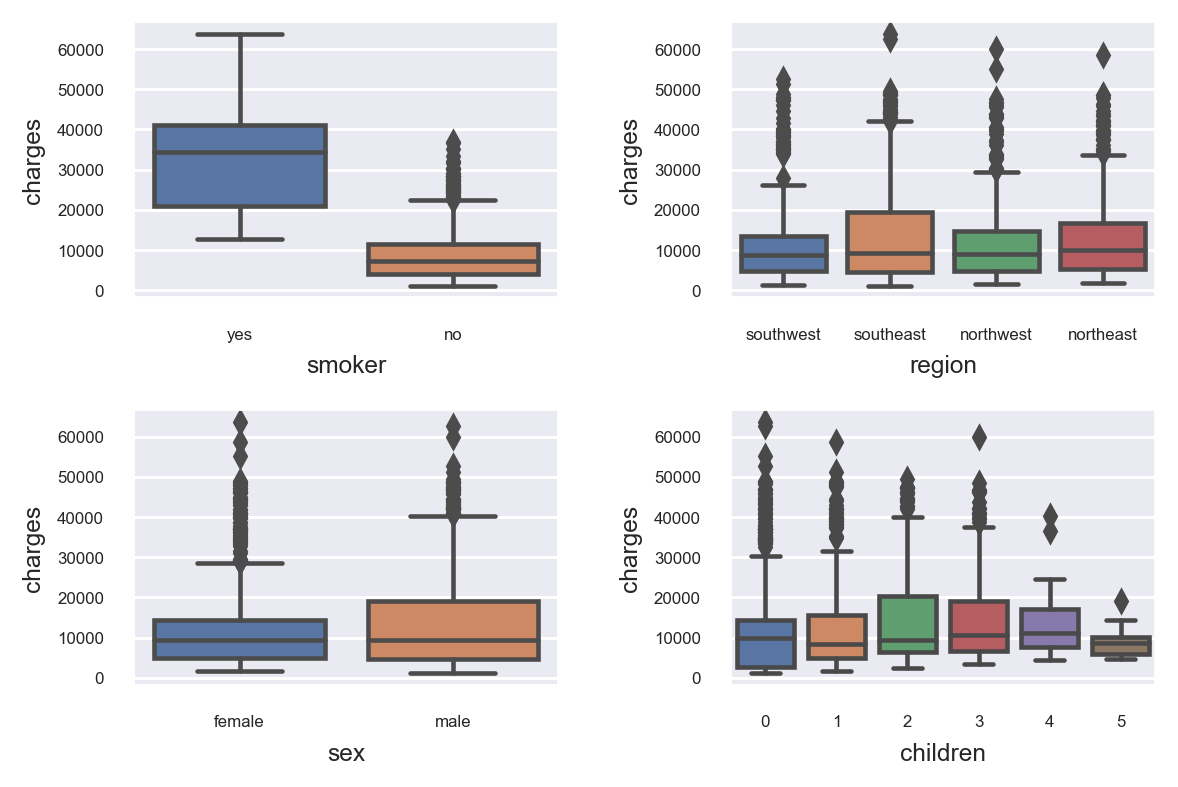

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [7]:
# Adjusting the font size of the figures to match the overall figure size
sns.set(font_scale = 0.5)

# Plotting box and whiskers to show the distribution of charges according to these features
fig = plt.figure(dpi=220)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

# How many are in each category of children
print(df['children'].value_counts())

In [8]:
#With the categorical data, it is clear the biggest correlation to charges is with smoking. There appears to be some correlation with sex and region but not large

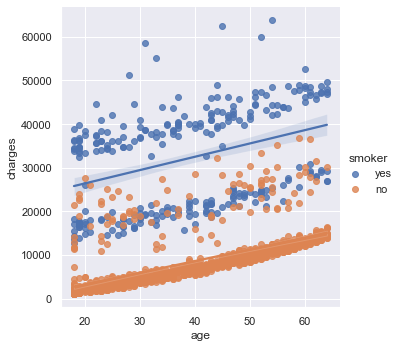

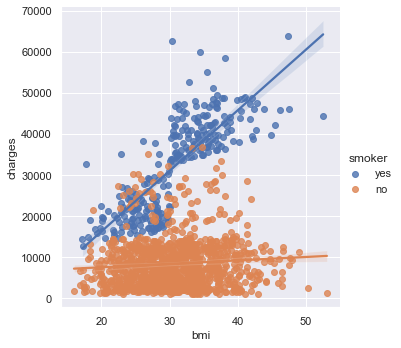

In [9]:
# Scatter plots to show the correlation between features and charges
sns.lmplot(data=df, x='age', y='charges', hue='smoker')
plt.show()
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

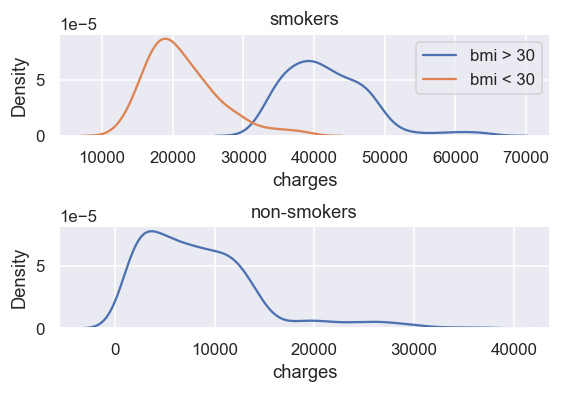

In [10]:
fig, ax = plt.subplots(nrows=2, dpi=110)
fig.tight_layout(pad=3.0)
# Plotting for smokers with bmi over 30
sns.distplot(df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]["charges"], ax=ax[0], hist=False,
             label='bmi > 30').set_title('smokers')
# Plotting for smokers with bmi under 30
sns.distplot(df[(df['smoker'] == 'yes') & (df['bmi'] < 30)]["charges"], ax=ax[0], hist=False, label='bmi < 30')
# Plotting for non smokers
sns.distplot(df[(df['smoker'] == 'no')]["charges"], ax=ax[1], hist=False).set_title('non-smokers')
ax[0].legend()
plt.show()

In [11]:
#With this knowledge in mind we can now show the distribution of charges but split it into our three easily defined groups: non-smokers, smokers with bmi > 30 and smokers with bmi <30.As predicted there is a tail on some of the peak which we can see on the above scatter plots as (outlier) although it is very consistent so these will be for some medical reason. Interestingly, the same tail does not exist in the smokers with bmi < 30.

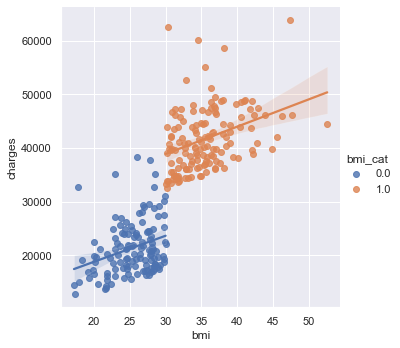

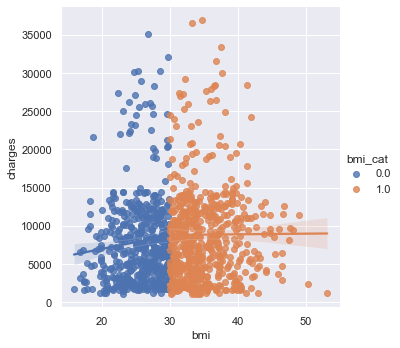

In [12]:
# Creates a new categorical feature for bmi (30 is the cuttoff point for obese)
df['bmi_cat'] = np.nan
df.loc[df['bmi'] <= 30, 'bmi_cat'] = 0
df.loc[df['bmi'] > 30, 'bmi_cat'] = 1

sns.lmplot(data=df[df['smoker'] == 'yes'], x='bmi', y='charges', hue='bmi_cat')
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='bmi', y='charges', hue='bmi_cat')
plt.show()

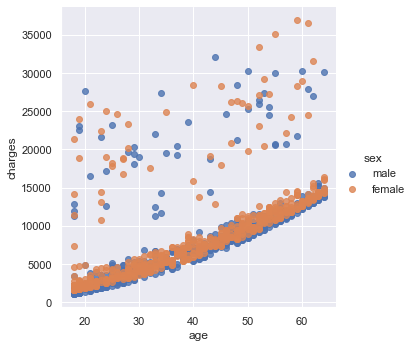

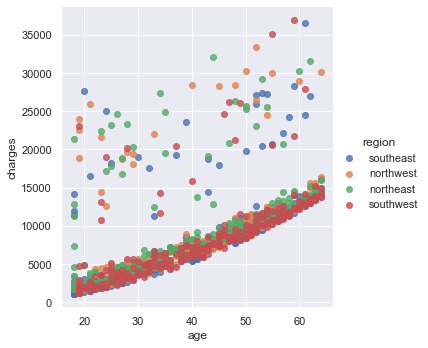

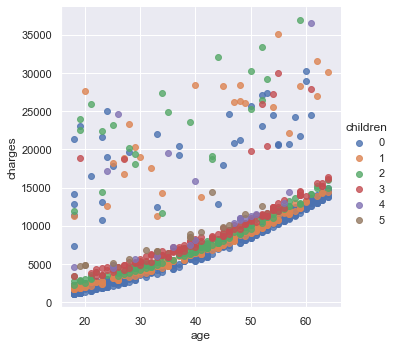

In [13]:
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='sex', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='region', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='children', fit_reg=False)
plt.show()

In [14]:
#Here we are looking for a reason for the unusually high charges on some instances

In [15]:
# Showing the correlation for various subgroups within the data
print('bmi correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['bmi']), '\n')
print('bmi correlation (smokers & bmi > 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]["charges"].corr(df['bmi']))
print('bmi correlation (smokers & bmi < 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]['charges'].corr(df['bmi']), '\n')
print('bmi correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['bmi']))
print('age correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['age']))
print('age correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['age']))

bmi correlation (smokers) -  0.8064806070155404 

bmi correlation (smokers & bmi > 30) -  0.3650624941873683
bmi correlation (smokers & bmi < 30) -  0.3650624941873683 

bmi correlation (non-smokers) -  0.08403654312833272
age correlation (smokers) -  0.36822444373077773
age correlation (non-smokers) -  0.6279467837664197


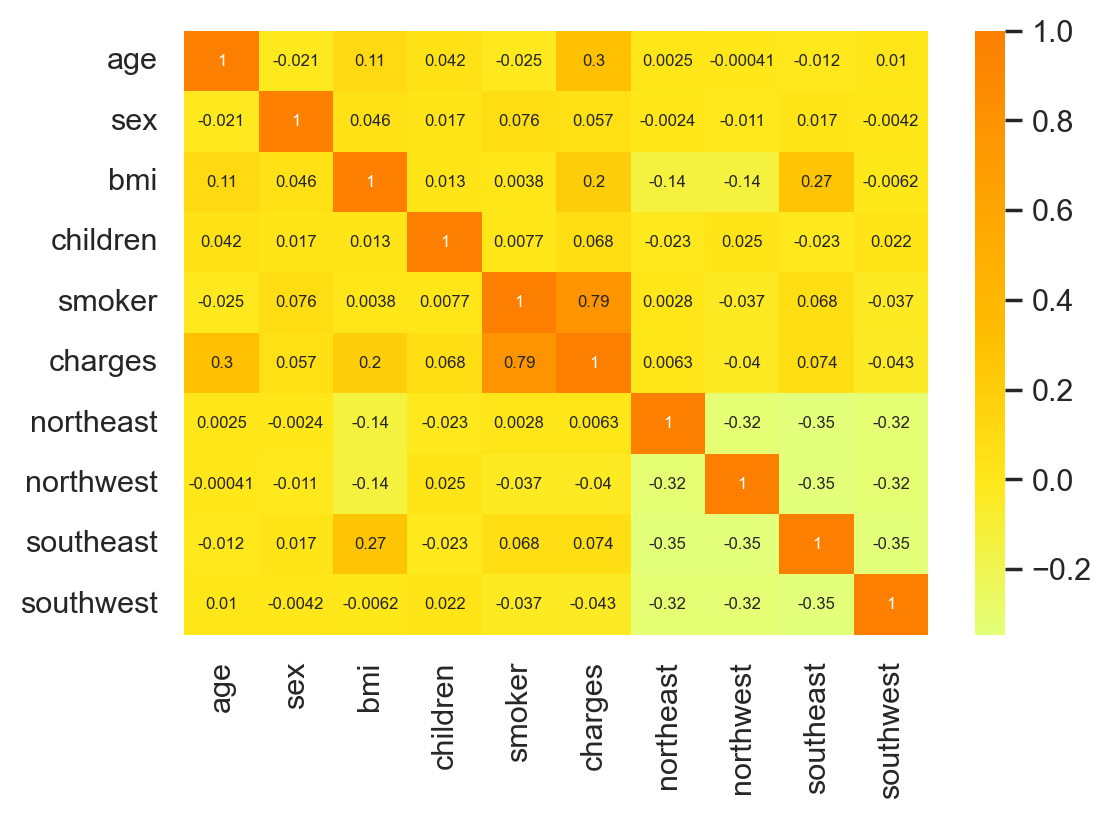

In [16]:
# Replacing yes/no with 1/0 to aid in modelling
df['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df['sex'].replace(('male', 'female'), (1, 0), inplace=True)

# Converts categorical data with more than two categories into a set of new features
# one for each different value in the old feature and only 1/0 as possible values
dummies = pd.get_dummies(df['region'])
df = pd.concat((df, dummies), axis = 1)
df = df.drop('region', axis = 1)

# Creating a Pearson correlation matrix to visualise correlations between features
df_corr = df.drop(['log_charges', 'bmi_cat'], axis = 1)
corr = df_corr.corr()
fig, ax = plt.subplots(dpi=200)
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax=ax, annot_kws={"size": 6})
plt.show()

In [17]:
# A new df where we split up the number of children into new features to check for correlations
df_children = df[['charges', 'children']]

dummies_children = pd.get_dummies(df_children['children'])
df_children = pd.concat((df_children, dummies_children), axis = 1)
df_children = df_children.drop('children', axis = 1)

print('0 children - ', df_children['charges'].corr(df_children[0]))
print('1 children - ', df_children['charges'].corr(df_children[1]))
print('2 children - ', df_children['charges'].corr(df_children[2]))
print('3 children - ', df_children['charges'].corr(df_children[3]))
print('4 children - ', df_children['charges'].corr(df_children[4]))
print('5 children - ', df_children['charges'].corr(df_children[5]))

0 children -  -0.06476047639409546
1 children -  -0.025180354353601806
2 children -  0.06963892513022253
3 children -  0.06279529451603874
4 children -  0.006613915717664696
5 children -  -0.04325837294882492


In [18]:
# linear regression from scratch

def linear_func(X, th0, th1):
    return (X * th1) + th0

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (1/2*mm) * np.sum((linear_func(X, th0, th1) - y)**2)

# The partial derivative of the cost function with respect to theta 0
def grad_descent_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum(linear_func(X, th0, th1) - y)

# The partial derivative of the cost function with respect to theta 1
def grad_descent_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum((linear_func(X, th0, th1) - y)*X)

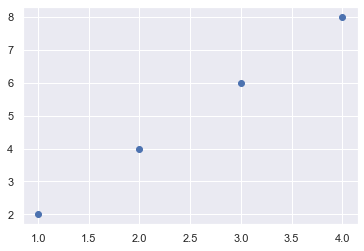

theta0 -  -4.9883369322054325e-06
theta1 -  2.000001696642868
final cost -  3.324681291387064e-11


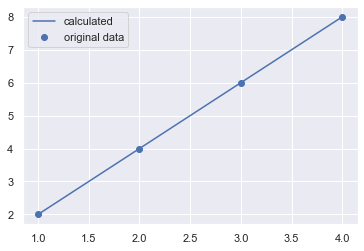

In [19]:
# Creating simple dummy values to fit a linear model to
X_train = np.array([1,2,3,4])
y_train = np.array([2,4,6,8])

plt.scatter(X_train, y_train)
plt.show()

# these are our inital guesses for the values of theta0 and theta1 (they do not have to be good guesses)
th0 = -15
th1 = 16
# The optimization parameter controls how quickly we descend the gradient
alpha = 0.1
loops = 1000

for ii in range(loops):
    # We must store the values in temporary holders so we can use the same values for both gradiant descent parts
    temp_th0 = th0 - grad_descent_th0(X_train, y_train, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X_train, y_train, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X_train, y_train, th0, th1))

# Plotting the old data plus our predictions
plt.plot(X_train, linear_func(X_train, th0, th1), label='calculated')
plt.scatter(X_train, y_train, label='original data')
plt.legend()
plt.show()

